In [11]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk import ngrams
import collections

import matplotlib.pyplot as plt

import spacy
import en_core_web_sm

In [12]:
DF = pd.read_csv("philosophy_data.csv")

# Sentence Count

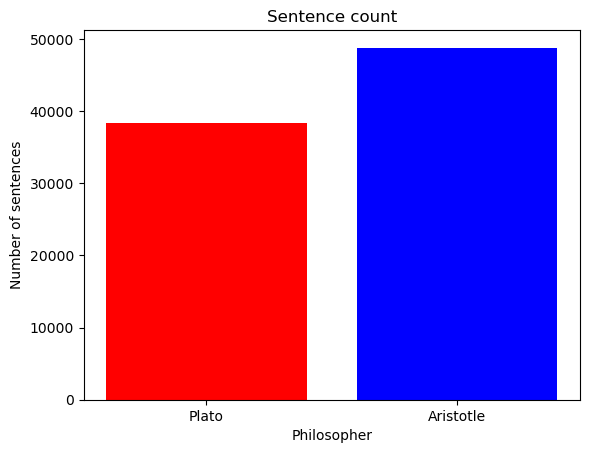

In [13]:
DF_Plato = DF[DF["title"]=="Plato - Complete Works"]["lemmatized_str"]

DF_Aristotle = DF[DF["title"]=="Aristotle - Complete Works"]["lemmatized_str"]

Philosophers = ['Plato', 'Aristotle']
Sent_num = [len(DF_Plato), len(DF_Aristotle)]
plt.bar(Philosophers, Sent_num, color=['red', 'blue'])
plt.title('Sentence count')
plt.xlabel('Philosopher')
plt.ylabel('Number of sentences')
plt.show()

# Word Frequency (Plato):


In [14]:
pd.options.mode.chained_assignment = None

for i in range(len(DF_Plato)):
    DF_Plato[i] = re.sub(r'[^\w\s]', '', DF_Plato[i])

nlp = en_core_web_sm.load()
   
# Tokenization
X = []
for i in range(len(DF_Plato)):
    text = DF_Plato[i]
    a = [token.text for token in nlp(text)]
    for j in range (len(a)):
        X.append(a[j])
      
    
# Removing StopWords   
Z = []     
for i in range(len(X)):
    if X[i] not in nlp.Defaults.stop_words:
        Z.append(X[i])

        
remove_words = {" ","PRON","s","  ","   "}
Y = []
for i in range(len(Z)):
    if Z[i] not in remove_words:
        Y.append(Z[i])
        
A = pd.value_counts(np.array(Y))
df = pd.DataFrame(A[:20])
df.reset_index(inplace=True)
df = df.iloc[::-1]

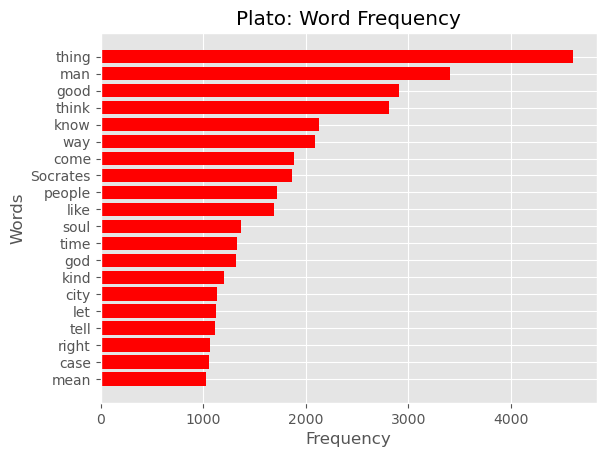

In [15]:
y = df["index"]
x = df[0]

plt.style.use('ggplot')

plt.barh(y,x,color=['red'])
plt.title('Plato: Word Frequency')
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.show()

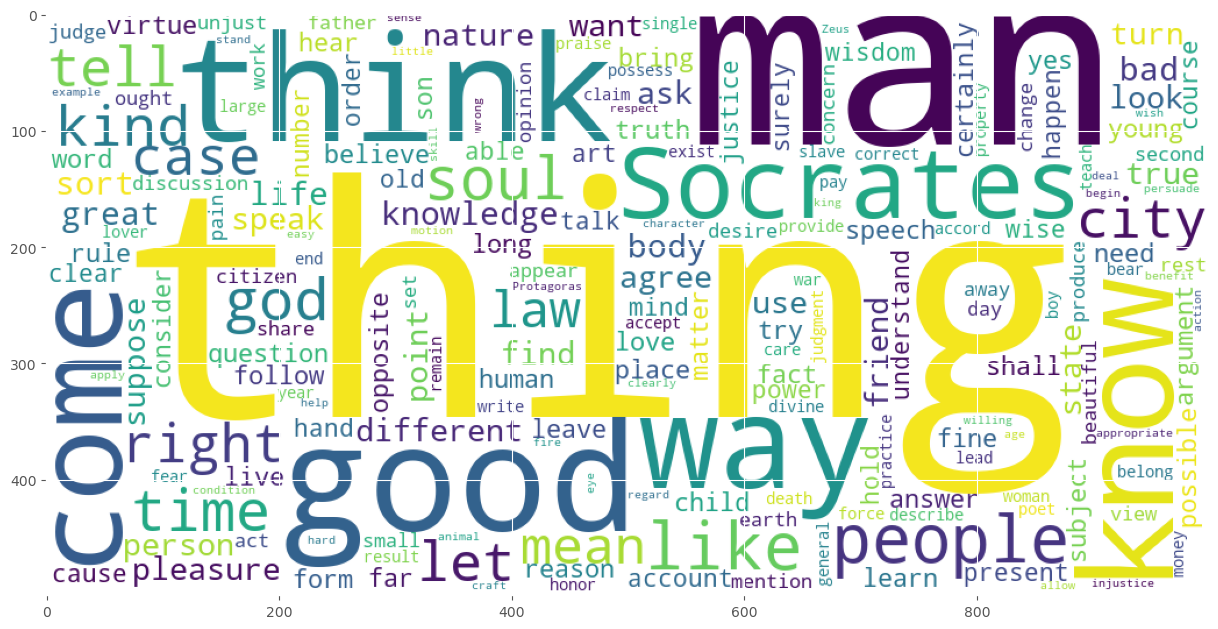

In [16]:
A = pd.Series(A)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(A)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# Word Frequency (Aristotle):

In [17]:
pd.options.mode.chained_assignment = None

for i in range(38366,87145):
    DF_Aristotle[i] = re.sub(r'[^\w\s]', '', DF_Aristotle[i])
    
nlp = en_core_web_sm.load()

P = []
for i in range(38366,87145):
    text = DF_Aristotle[i]
    a = [token.text for token in nlp(text)]
    for j in range (len(a)):
        P.append(a[j])
        
Q = []      
for i in range(len(P)):
    if P[i] not in nlp.Defaults.stop_words:
        Q.append(P[i])
        
remove_words = {" ","PRON","s","  ","   "}
R = []
for i in range(len(Q)):
    if Q[i] not in remove_words:
        R.append(Q[i])
        
B = pd.value_counts(np.array(R))
df = pd.DataFrame(B[:20])
df.reset_index(inplace=True)
df = df.iloc[::-1]

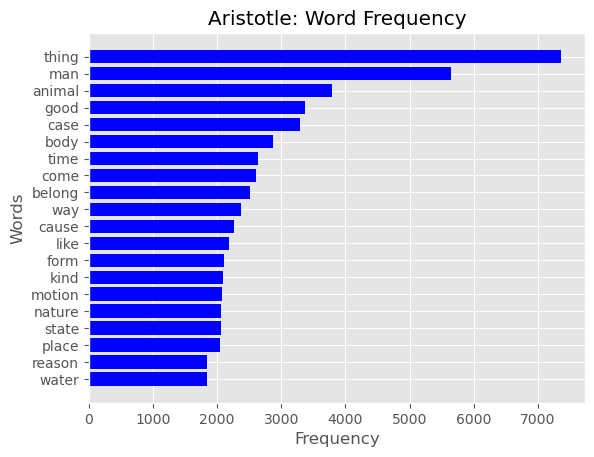

In [18]:
import matplotlib.pyplot as plt

y = df["index"]
x = df[0]

plt.style.use('ggplot')

plt.barh(y,x,color=['blue'])
plt.title('Aristotle: Word Frequency')
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.show()

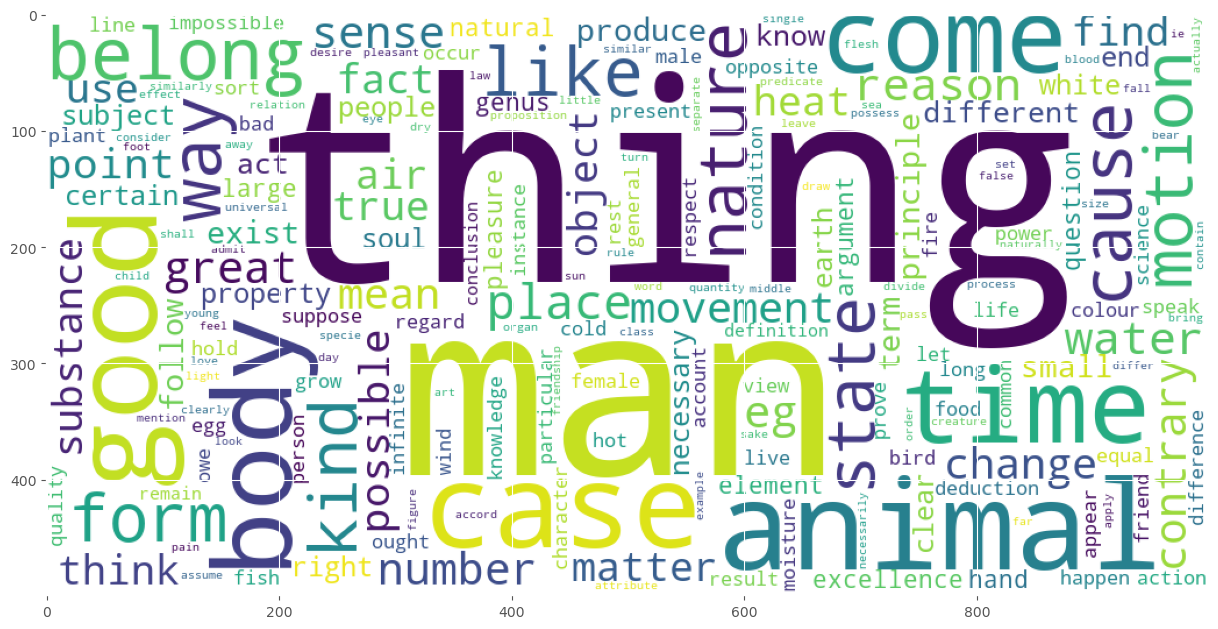

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(B)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# Similar Words

In [20]:
# Creating Word2Vec model for Plato

DF_Plato = DF[DF["title"]=="Plato - Complete Works"]["sentence_lowered"]

Plato_words = []
import re
for i in range (len(DF_Plato)):
    sent = re.sub(r'[("*)]', '', DF_Plato[i])
    sent = sent.split()
    Plato_words.append(sent)
    
from gensim.models import Word2Vec
Plato_model = Word2Vec(sentences=Plato_words, vector_size=100, window=5, min_count=1, workers=4)
Plato_model.save("word2vec.Plato_model")

In [21]:
# Creating Word2Vec model for Aristotle

DF_Aristotle = DF[DF["title"]=="Aristotle - Complete Works"]["sentence_lowered"]

Aristotle_words = []
import re
for i in range (38366,87145):
    sent = re.sub(r'[("*)]', '', DF_Aristotle[i])
    sent = sent.split()
    Aristotle_words.append(sent)
    
from gensim.models import Word2Vec
Aristotle_model = Word2Vec(sentences=Aristotle_words, vector_size=100, window=5, min_count=1, workers=4)
Aristotle_model.save("word2vec.Aristotle_model")

## Ethical Views:

### Virtue

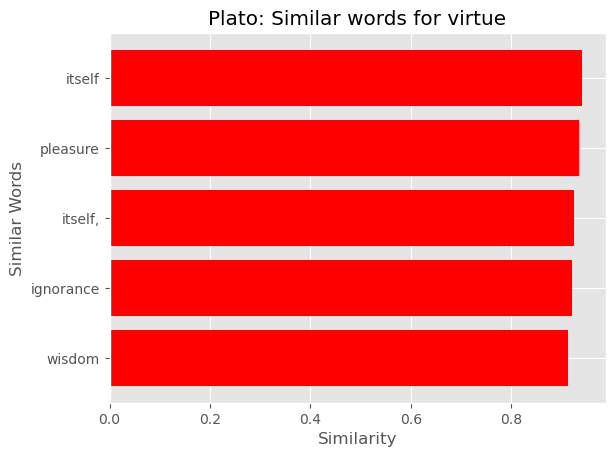

In [22]:
# Bar chart for similar words for Plato

sims = Plato_model.wv.most_similar('virtue', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['red'])
plt.title('Plato: Similar words for virtue')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

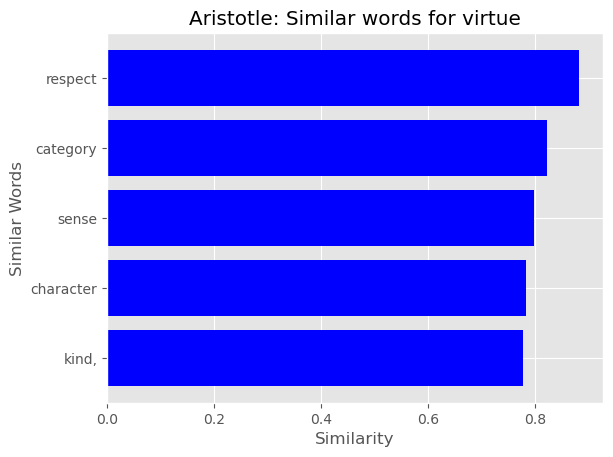

In [23]:
# Bar chart for similar words for Aristotle

sims = Aristotle_model.wv.most_similar('virtue', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['blue'])
plt.title('Aristotle: Similar words for virtue')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

### Happiness

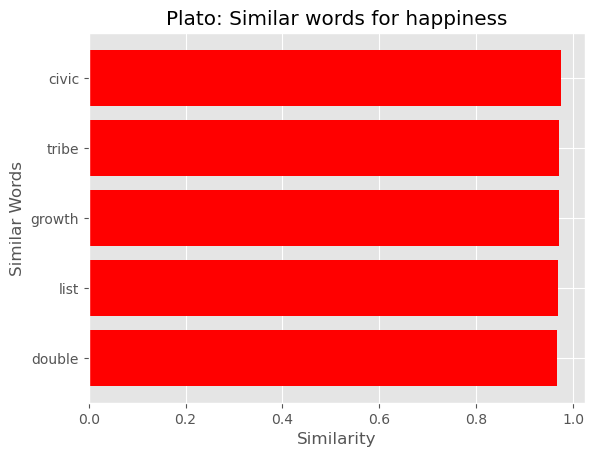

In [26]:
# Bar chart for similar words for Plato

sims = Plato_model.wv.most_similar('happiness', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['red'])
plt.title('Plato: Similar words for happiness')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

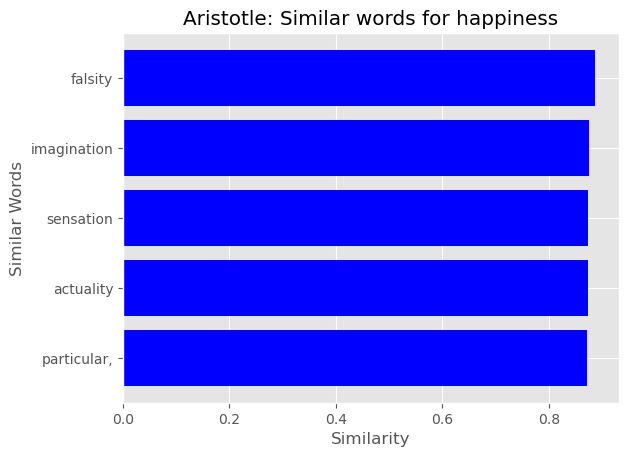

In [25]:
# Bar chart for similar words for Aristotle

sims = Aristotle_model.wv.most_similar('happiness', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['blue'])
plt.title('Aristotle: Similar words for happiness')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

## Political Views:

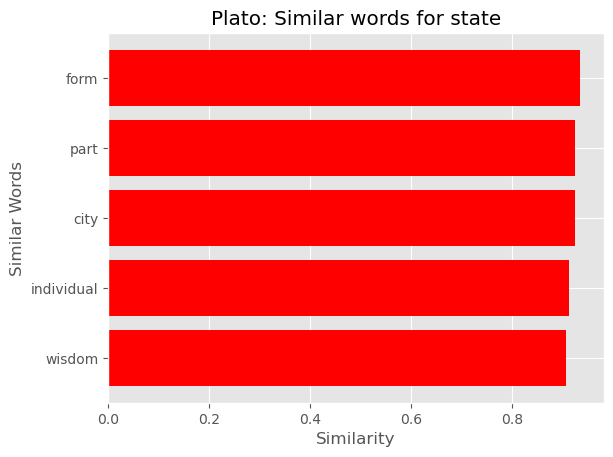

In [43]:
# Bar chart for similar words for Plato

sims = Plato_model.wv.most_similar('state', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['red'])
plt.title('Plato: Similar words for state')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

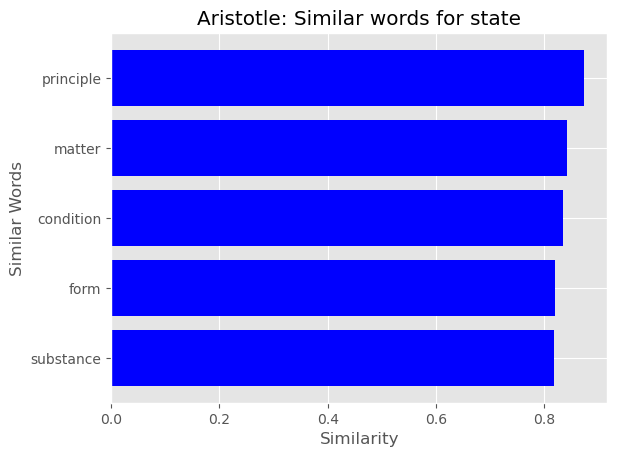

In [42]:
# Bar chart for similar words for Aristotle

sims = Aristotle_model.wv.most_similar('state', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['blue'])
plt.title('Aristotle: Similar words for state')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

## Scientific Views:

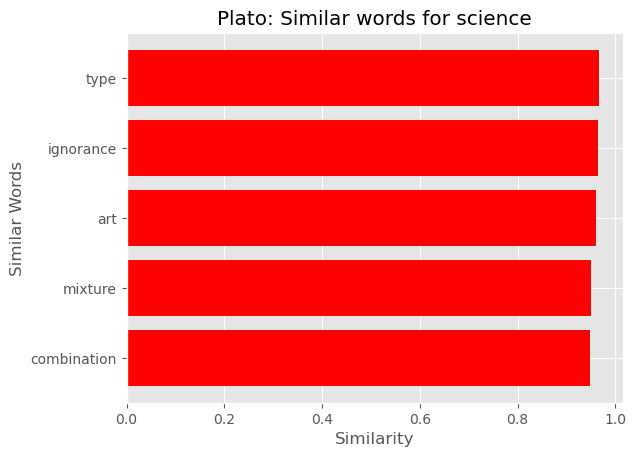

In [48]:
# Bar chart for similar words for Plato

sims = Plato_model.wv.most_similar('science', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['red'])
plt.title('Plato: Similar words for science')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

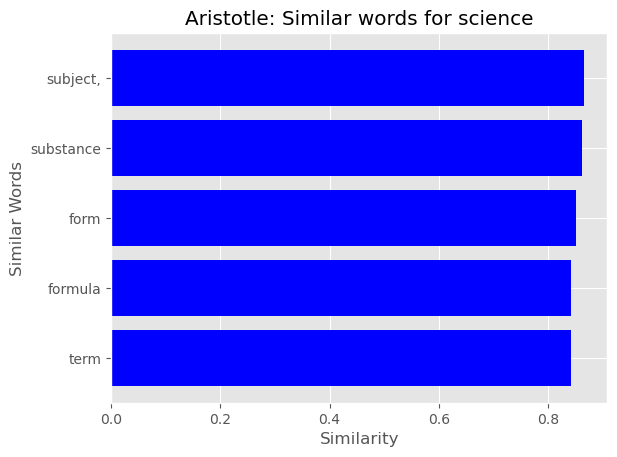

In [49]:
# Bar chart for similar words for Aristotle

sims = Aristotle_model.wv.most_similar('science', topn=5)  

sim_word = []
sim_str  = []
for i in range(len(sims)):
    sim_word.append(sims[i][0])  
for i in range(len(sims)):
    sim_str.append(sims[i][1])  
sim_word = list(reversed(sim_word))
sim_str  = list(reversed(sim_str))


import matplotlib.pyplot as plt
y = sim_word
x = sim_str
plt.style.use('ggplot')
plt.barh(y,x,color=['blue'])
plt.title('Aristotle: Similar words for science')
plt.ylabel('Similar Words')
plt.xlabel('Similarity')
plt.show()

## Word Network Graph (Plato)

In [50]:
bigrams = list(ngrams(Y, 2)) 
bigram_counts = collections.Counter(bigrams)
df = pd.DataFrame.from_records(bigram_counts.most_common(), columns=['bigram','count'])

d = []
for i in range(len(df)):
    if (df["bigram"][i][0]==df["bigram"][i][1]):
        d.append(i)     
for i in d:
    df1=df.drop(df.index[d])  
df1.reset_index(drop=True,inplace=True)

x = []
y = []
for i in range(len(df1)):
    x.append(df1["bigram"][i][0])
    y.append(df1["bigram"][i][1])

df1["source"] = x
df1["target"] = y
df1.drop("bigram", axis=1, inplace=True)

ListtoKeep = list(A[:15].index)

df2 = df1[df1.source.isin(ListtoKeep)]
df2.reset_index(drop=True,inplace=True)

z = []
for i in range(len(df2)):
    z.append(df2["count"][i])
    
df2.drop("count", axis=1, inplace=True)
df3 = pd.DataFrame(np.sort(df2.values,axis=1),columns=df2.columns)
df3["count"] = z
df4 = df3.groupby(['source','target'],sort=False,as_index=False).sum()

df5 = df4[df4["count"]>20]
df5.to_csv('graph.csv', index=False)

In [51]:
import networkx as nx
import pandas as pd

df = pd.read_csv('graph.csv')
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df,source = "source",target="target", edge_attr='count', create_using=Graphtype)

from pyvis.network import Network
net = Network(notebook = True,width="1000px",height="800px",bgcolor="#222222",font_color="white")

node_degree = dict(G.degree)
nx.set_node_attributes(G,node_degree,"size")

net.from_nx(G)
net.show("example.html")

## Word Network Graph (Aristotle)

In [52]:
bigrams = list(ngrams(R, 2)) 
import collections
bigram_counts = collections.Counter(bigrams)
df = pd.DataFrame.from_records(bigram_counts.most_common(), columns=['bigram','count'])

d = []
for i in range(len(df)):
    if (df["bigram"][i][0]==df["bigram"][i][1]):
        d.append(i)      
for i in d:
    df1=df.drop(df.index[d])  
df1.reset_index(drop=True,inplace=True)

x = []
y = []
for i in range(len(df1)):
    x.append(df1["bigram"][i][0])
    y.append(df1["bigram"][i][1])

df1["source"] = x
df1["target"] = y
df1.drop("bigram", axis=1, inplace=True)

ListtoKeep = list(B[:15].index)
df2 = df1[df1.source.isin(ListtoKeep)]
df2.reset_index(drop=True,inplace=True)

z = []
for i in range(len(df2)):
    z.append(df2["count"][i])
    
df2.drop("count", axis=1, inplace=True)
df3 = pd.DataFrame(np.sort(df2.values,axis=1),columns=df2.columns)
df3["count"] = z
df4 = df3.groupby(['source','target'],sort=False,as_index=False).sum()
df5 = df4[df4["count"]>35]
df5.to_csv('graph.csv', index=False)

In [53]:
import networkx as nx
import pandas as pd

df = pd.read_csv('graph.csv')
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df,source = "source",target="target", edge_attr='count', create_using=Graphtype)

from pyvis.network import Network
net = Network(notebook = True,width="1000px",height="800px",bgcolor="#222222",font_color="white")

node_degree = dict(G.degree)
nx.set_node_attributes(G,node_degree,"size")

net.from_nx(G)
net.show("example.html")